# Regression Notebook

In [1]:
#load data
from regression import *
train_data = load_data('regression_train.csv')
test_data = load_data('regression_test.csv')

## 5.1a)

Visualizing data...


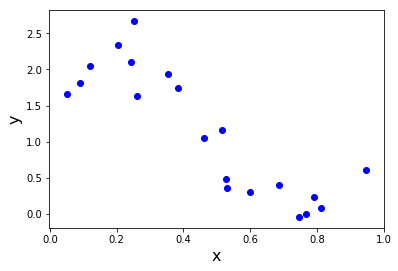

In [2]:
# part a: main code for visualizations
print('Visualizing data...')

plot_data(train_data.X, train_data.y)

We see from the plot that if just fit a polynomial of order 1 (i.e. a line), it will underfit the data. We will have to choose a higher degree model in order to obtain a good fit. 

## 5.1b)

In [3]:
# parts b-f: main code for linear regression
print('Investigating linear regression...')

model = PolynomialRegression()
Xl = model.generate_polynomial_features(train_data.X)
print

Investigating linear regression...


<function print>

## 5.1c)

y = np.dot(X, self.coef_)

## 5.1d)

In [4]:
## Code Snippet:

model.coef_ = np.zeros(2)
model.cost(train_data.X, train_data.y)

40.233847409671

In [5]:
## Fitting with Gradient Descent

etas = [0.0001, 0.001, 0.01, 0.0407]
table = []
for eta in etas:
    num_iters, model, time = model.fit_GD(X=train_data.X, y=train_data.y, eta = eta, verbose = False)
    table.append({'eta': eta, 'coefficient': model.coef_, 'num_iters': num_iters, 'cost': model.cost(train_data.X,train_data.y), 'time' : time})

number of iterations: 10000
number of iterations: 10000
number of iterations: 1495
number of iterations: 384


In [6]:
print("Testing different etas...")

for item in table:
    print("eta:" + str(item['eta']) + "|" + "coefficients:" + str(item['coefficient']) + "|" + "cost:" + str(item['cost']) + "|" + 'num_iterations:' + str(item['num_iters']) + "|" + 'time:' + str(item['time'])) 

Testing different etas...
eta:0.0001|coefficients:[ 1.91573585 -1.74358989]|cost:5.49356558874|num_iterations:10000|time:1.0606250000000002
eta:0.001|coefficients:[ 2.4463815  -2.81630184]|cost:3.91257640947|num_iterations:10000|time:0.962936
eta:0.01|coefficients:[ 2.446407   -2.81635339]|cost:3.91257640579|num_iterations:1495|time:0.1493500000000001
eta:0.0407|coefficients:[ 2.44640706 -2.81635352]|cost:3.91257640579|num_iterations:384|time:0.04141099999999964


We see that that for eta = 0.0001 and 0.001, the algorithm doesn't converge. The coefficients are very incorrect for eta - 0.0001 but are pretty close for the other 3 etas tested. For eta = 0.01, the algorithm does converge and the coefficients are pretty accuract. For eta = 0.0407, the algorithm converges the fastest, has the most accurate coefficients (as compared to the closed form solution below). 

## 5.1e

In [7]:
print("Getting closed form solution for theta...")

model, time_end = model.fit(train_data.X, train_data.y)
print("Coefficients:")
print(model.coef_)
print("Cost:")
print(model.cost(train_data.X, train_data.y))
print("Time to run:")
print(time_end)

Getting closed form solution for theta...
Coefficients:
[ 2.44640709 -2.81635359]
Cost:
3.91257640579
Time to run:
0.008859999999999868


We see that both the coefficients and cost are close to the ones obtained with GD when the the algorithm actually converged. The time to run this was also much faster since this implemntation is completely vectorized whereas the GD implentation had up to 10000 iterations. 

## 5.1f

In [8]:
print("Now using learning rate a function of k")

num_iters, model, time = model.fit_GD(X = train_data.X, y = train_data.y, verbose = False)
print("Coefficients:")
print(model.coef_)
print("Cost:")
print(model.cost(train_data.X, train_data.y))
print("Time to run:")
print(time)

Now using learning rate a function of k
number of iterations: 10000
Coefficients:
[ 2.44634965 -2.81623746]
Cost:
3.91257642432
Time to run:
0.9856609999999999


With this we see that the coeficients and cost are quite close to the closed form solution above but the time to run is MUCH larger than the closed form solution above. It maxed out on the iterations so it didn't converge either. 

## 5.1e-h)

We use the RMSE because since now that we are using polynomials, the error will go very low and just having 1/2 x J will be very small and hard to compare. With sqrt(1/N x J), the error will be easier to read as it will be a larger number.

## 5.1i)

Now fitting polynomial models of varying orders: (green is test error, blue is train error)


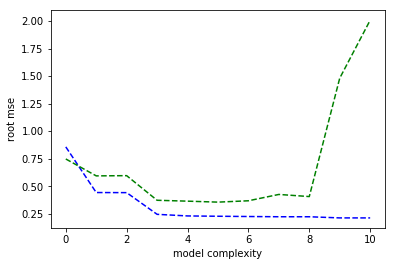

In [11]:
print("Now fitting polynomial models of varying orders: (green is test error, blue is train error)")

nomials = np.arange(0,11)
d_train = {}
d_test = {}
for m in nomials:
    model = PolynomialRegression(m=m)
    model.fit(X=train_data.X, y = train_data.y)
    d_train[m]=model.rms_error(train_data.X, train_data.y)
    d_test[m]=model.rms_error(test_data.X, test_data.y)
plt.plot(d_train.keys(), d_train.values(), 'b--', label="training error")
plt.plot(d_test.keys(), d_test.values(), 'g--', label = "test error")
plt.xlabel('model complexity')
plt.ylabel('root mse')
plt.show()
    



We see that when the order of the polynomial is low we have high test and train error which corresponds to underfitting. As the order goes up, the test error decreases until it reaches a low value at around order = 4-6 and then it starts going up corresponding to overfitting. The trining error keeps getting lower and lower as expected since the high order polynomials are overfitting. Visually, the best fit seemed to occur at around m = 5 or m =6 as this represents the low point in the test error curve. 